## Simple Linear Regression Model 

Following: https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4 

Nikhitha Sakhamuri
February 18,2023

Objective: Learn how to create a simple linear regression model, and understand how to evaluate the model. 

### Using statsmodel

In [7]:
#import packages

import numpy as np
import pandas as pd

In [8]:
#read in data 

advertising=pd.read_csv("company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#our Y variable is Sales

In [10]:
advertising.shape

(200, 4)

In [12]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [26]:
#import matplotlib and seaborn libraries to visualize data 
import matplotlib.pyplot as plt
import seaborn as sns

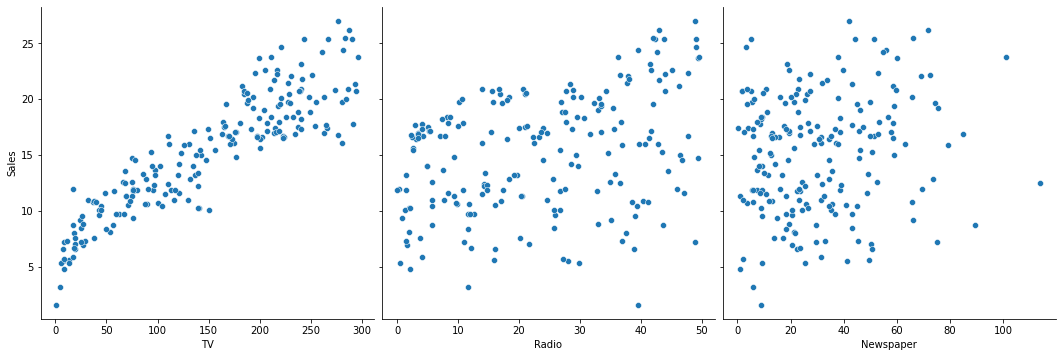

In [27]:
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper']
             ,y_vars=['Sales'],height=5, aspect=1, kind='scatter'
        )

plt.show()

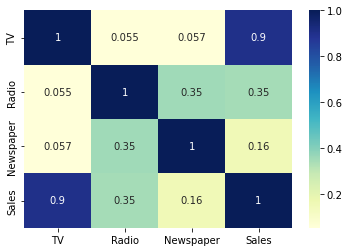

In [29]:
#visualize data
#sns.heatmap(advertising.corr())
sns.heatmap(advertising.corr(),cmap="YlGnBu",annot=True)
plt.show()

From above you see the biggest correlation is between Sales and TV so that is what we will use for our model 

In [30]:
x=advertising['TV']
y=advertising['Sales']

Now that we have our variables, we want to create the TRAIN and TEST sets

Info about train-test splits: 
https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ 



In [34]:
from sklearn.model_selection import train_test_split
#x=TV
#y=Sales
#train_size =0.7 -- Used to fit the machine learning model
#test_size=0.3 -- Used to evaluate the fit machine learning model
#random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3
                                              ,random_state=100)

In [35]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [37]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [43]:
import statsmodels.api as sm

#adding a constant because statsmodel defaults to a line that passes through
#origin

x_train_sm=sm.add_constant(x_train)

In [44]:
#fit regression line using "OLS" (Ordinary Least Square) method

lr=sm.OLS(y_train,x_train_sm).fit()

In [45]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [46]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.52e-52
Time:                        21:10:55   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Determining if Model is viable

1. P-Value and Coefficient 

Coefficient for TV=.0545 and P-value is 0/close to 0-- points to statistical significance 

2. R-Squared Value

R-squared = 0.816 -- 81.6% of the time sales variance can be explained by TV column

3. F-statistic

extremely low value, again pointing to statistical significance 

# Since it is pointing towards statisical significance we can move forward with this model


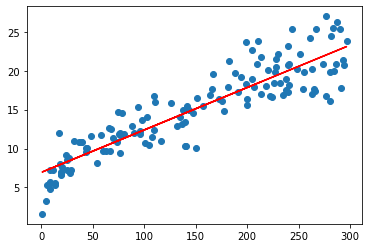

In [47]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9487+0.0545*x_train,'r')
plt.show()

# Residual Analysis

Error = Actual y value - y predicted value


In [48]:
#predict y_value using training data of X

y_train_pred=lr.predict(x_train_sm)

#creat residuals from y_train data and predicted y_data
res=(y_train-y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


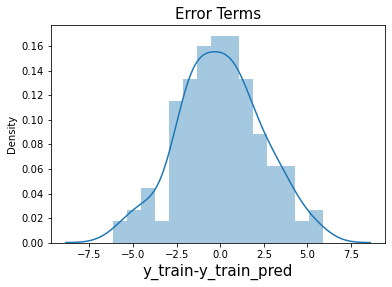

In [49]:
#plot to see if residuals follow normal distribution 

#WHY DO WE DO THIS? Why do we want our residuals to follow normal distribution?

fig=plt.figure()
sns.distplot(res,bins=15)
plt.title('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

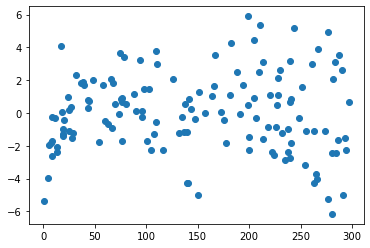

In [50]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
#residuals do not follow any pattern.. what does this mean though? 

In [51]:
#add constant to x_test
x_test_sm = sm.add_constant(x_test)

#predict y values with x_test_sm
y_test_pred=lr.predict(x_test_sm)

#print predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [52]:
from sklearn.metrics import r2_score

#check r-squared
r_squared=r2_score(y_test,y_test_pred)
r_squared

0.7921031601245659

r2 for testing set = 0.792 = 79.2%
r2 for training data = 0.815 = 81.5% 

r2 value for test set is within 5% of r2 for training set -- MODEL IS PRETTY STABLE 

## we can use this this model since it has generalized on unseen test data 



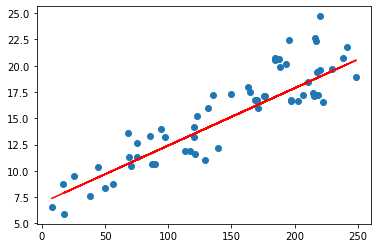

In [53]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,'r')
plt.show()

### Conclusion

I used the statsmodel library to create a linear regression model. I had taken the data and split it into a train and test set. After doing this I had created the linear regression model. Once I got the model I reviewed the model viability using p-squared, coefficient, r-squared, and f-statistic. Based off this, I saw that the model showed statistical significance with a 81% of the time the sales being correlated to TV. 

After this, I ran the test data set, and got an r squared of .792, or 79.2%. Because this was within 5% of the original model's r squared, this means that this linear regression model is stable. 
